In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [82]:
df = pd.read_csv('BTC-USDp.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Volume,1 day(s) ago,2 day(s) ago,3 day(s) ago,4 day(s) ago,...,51 day(s) ago,52 day(s) ago,53 day(s) ago,54 day(s) ago,55 day(s) ago,56 day(s) ago,57 day(s) ago,58 day(s) ago,59 day(s) ago,60 day(s) ago
0,2014-11-16,374.730011,390.799011,374.601990,387.881989,11905600,376.132996,397.817993,420.734985,423.561005,...,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
1,2014-11-17,388.348999,410.199005,377.502014,387.407990,41518800,387.881989,376.132996,397.817993,420.734985,...,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2,2014-11-18,387.785004,392.402008,371.117004,375.197998,32222500,387.407990,387.881989,376.132996,397.817993,...,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
3,2014-11-19,373.895996,386.480988,373.895996,380.554993,18931800,375.197998,387.407990,387.881989,376.132996,...,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
4,2014-11-20,380.307007,382.024994,356.781006,357.839996,25233200,380.554993,375.197998,387.407990,387.881989,...,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
5,2014-11-21,357.878998,357.878998,344.112000,350.847992,29850100,357.839996,380.554993,375.197998,387.407990,...,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008
6,2014-11-22,351.604004,364.841003,350.877991,352.920013,15273000,350.847992,357.839996,380.554993,375.197998,...,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985
7,2014-11-23,353.174988,370.845001,353.174988,367.572998,15151600,352.920013,350.847992,357.839996,380.554993,...,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005,423.204987
8,2014-11-24,366.947998,387.209015,366.669006,376.901001,30930100,367.572998,352.920013,350.847992,357.839996,...,328.865997,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988,411.574005
9,2014-11-25,376.885986,394.700989,374.783997,375.347992,25442200,376.901001,367.572998,352.920013,350.847992,...,320.510010,328.865997,359.511993,375.071991,383.614990,386.944000,375.467010,377.181000,399.519989,404.424988


## SPLITTING DATA
- We split our dataset manually as using the train_test_split by default takes samples randomly. Though this is a recommended machine learning technique it did not apply to our use case as we are dealing with time series data and that would be "cheating"

In [83]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

In [84]:

X_train = train_data.drop(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], axis=1)
y_train = train_data['Close']
X_test = test_data.drop(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], axis=1)
y_test = test_data['Close']
dates_test = test_data['Date']


## SCALING

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## TRAINING THE MODEL

In [86]:




model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')





MAE: 661.379517281319
MSE: 1170000.537440352
RMSE: 1081.665631071059


In [87]:
comparison_df = pd.DataFrame({
    'Date': dates_test,
    'True_Price': y_test,
    'Predicted_Price': y_pred,
    'Difference(abs)': abs(y_pred-y_test)
})
comparison_df


,Date,True_Price,Predicted_Price,Difference(abs)
2807,2022-07-24,22609.164063,22910.300055,301.135992
2808,2022-07-25,21361.701172,22269.393502,907.692330
2809,2022-07-26,21239.753906,21035.785238,203.968668
2810,2022-07-27,22930.548828,21130.372912,1800.175916
2811,2022-07-28,23843.886719,23189.602745,654.283974
...,...,...,...,...
3504,2024-06-20,64828.656250,64678.878783,149.777467
3505,2024-06-21,64096.199219,64799.332590,703.133371
3506,2024-06-22,64252.578125,64317.219698,64.641573
3507,2024-06-23,63180.796875,63570.569735,389.772860


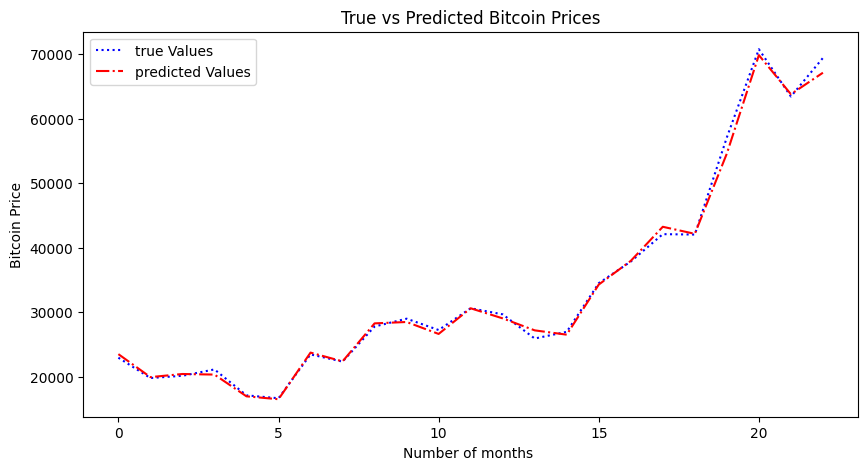

In [88]:
#viewing it on a monthly basis for better visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(comparison_df[comparison_df.index%30==0]['True_Price'].values, label='true Values',color='blue',linestyle='dotted')
plt.plot(comparison_df[comparison_df.index%30==0]['Predicted_Price'].values,linestyle='dashdot', label='predicted Values',color='red')
plt.xlabel('Number of months ')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()


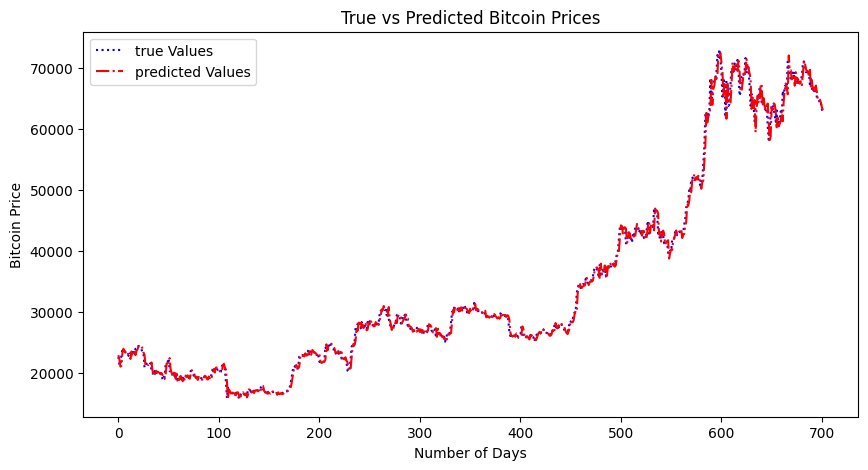

In [89]:
#viewing it on a monthly basis for better visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['True_Price'].values, label='true Values',color='blue',linestyle='dotted')
plt.plot(comparison_df['Predicted_Price'].values,linestyle='dashdot', label='predicted Values',color='red')
plt.xlabel('Number of Days')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()
